 It          Energy           ||g||          (g,du)           alpha          tol_cg   cg_it
  0   -2.189399e+00    8.786318e-01   -2.970296e+01    1.250000e-01    5.000000e-01       1
  1   -2.588900e+00    7.092549e-01   -4.242235e+00    1.250000e-01    5.000000e-01       2
  2   -2.758269e+00    1.346804e-01   -3.214654e-01    1.000000e+00    5.000000e-01       2
  3   -2.761608e+00    1.664153e-02   -6.552245e-03    1.000000e+00    5.000000e-01       1
  4   -2.761780e+00    3.488480e-04   -3.448126e-04    1.000000e+00    2.658770e-01       3
  5   -2.761780e+00    1.295193e-05   -2.364783e-07    1.000000e+00    3.849481e-02       3
  6   -2.761780e+00    5.493872e-08   -2.096347e-10    1.000000e+00    7.417393e-03       4
Norm of the gradient less than tolerance
Inexact Newton CG converged in  6 nonlinear iterations and  16 linear iterations.
Final norm of the gradient 5.493871993618149e-08
Value of the cost functional -2.7617804983042284


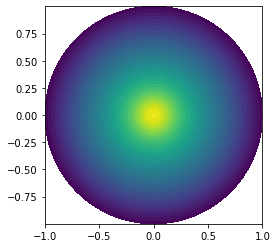

In [1]:
# Initialization
import matplotlib.pyplot as plt
%matplotlib inline

from dolfin import *
import math
import numpy as np
import logging
from unconstrainedMinimization import InexactNewtonCG

logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
set_log_active(False)

# Generate mesh for the unit circle domain.

# Uncomment this to generate mesh using mshr:
# import mshr
# mesh = mshr.generate_mesh(mshr.Circle(Point(0.,0.), 1.), 40)

# Alternatively, load the mesh:
mesh = Mesh("circle.xml")

# Define the finite element space
Vh = FunctionSpace(mesh, "Lagrange", 2)

u = Function(Vh)
u_hat = TestFunction(Vh)
u_tilde = TrialFunction(Vh)

# Define the energy functional
f = Expression("100*exp(-100*(x[0]*x[0] + x[1]*x[1]))",degree=5)
beta = Constant(100)
k1 = Constant(.1)
k2 = Constant(1.)

E = Constant(.5)*beta*u*u*ds + \
    Constant(.5)*(k1 + k2*u*u)*inner(nabla_grad(u), nabla_grad(u))*dx - \
    f*u*dx

grad = beta*u*u_hat*ds + (k2*u*u_hat)*inner(nabla_grad(u), nabla_grad(u))*dx + \
       (k1 + k2*u*u)*inner(nabla_grad(u), nabla_grad(u_hat))*dx - f*u_hat*dx

H = beta*u_tilde*u_hat*ds + \
    k2*u_tilde*u_hat*inner(nabla_grad(u), nabla_grad(u))*dx + \
    Constant(2.)*(k2*u*u_hat)*inner(nabla_grad(u_tilde), nabla_grad(u))*dx + \
    Constant(2.)*k2*u_tilde*u*inner(nabla_grad(u), nabla_grad(u_hat))*dx + \
    (k1 + k2*u*u)*inner(nabla_grad(u_tilde), nabla_grad(u_hat))*dx
    
    
solver = InexactNewtonCG()
solver.parameters["rel_tolerance"] = 1e-6
solver.parameters["abs_tolerance"] = 1e-9
solver.parameters["gdu_tolerance"] = 1e-18
solver.parameters["max_iter"] = 1000
solver.parameters["c_armijo"] = 1e-5
solver.parameters["print_level"] = 1
solver.parameters["max_backtracking_iter"] = 10

solver.solve(E, u, grad, H)

plot(u)
plt.show()

Copyright (c) 2016, The University of Texas at Austin & University of California, Merced.

All Rights reserved.
See file COPYRIGHT for details.

This file is part of the hIPPYlib library. For more information and source code availability see https://hippylib.github.io.

hIPPYlib is free software; you can redistribute it and/or modify it under the terms of the GNU General Public License (as published by the Free Software Foundation) version 2.0 dated June 1991.